In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


In [21]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [22]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Форма обучающих данных: {x_train.shape}")  # (60000, 28, 28)
print(f"Форма тестовых данных: {x_test.shape}")    # (10000, 28, 28)

Форма обучающих данных: (60000, 28, 28)
Форма тестовых данных: (10000, 28, 28)


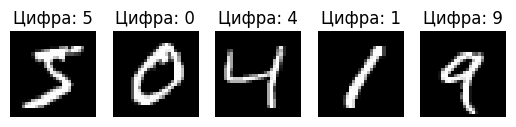

In [23]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Цифра: {y_train[i]}")
    plt.axis('off')
plt.show()

In [24]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [25]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

print(f"Новая форма данных: {x_train.shape}")

Новая форма данных: (60000, 784)


In [26]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (28*28,)),
    Dense(10, activation= 'softmax')
])

model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [28]:
history = model.fit(x_train, y_train,
                    epochs = 5,
                    batch_size = 32,
                    validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.2537 - accuracy: 0.9279 - val_loss: 0.1302 - val_accuracy: 0.9582
Epoch 2/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.1130 - accuracy: 0.9668 - val_loss: 0.0953 - val_accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 2s 912us/step - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.0811 - val_accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 917us/step - loss: 0.0586 - accuracy: 0.9821 - val_loss: 0.0761 - val_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 2s 915us/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.0763 - val_accuracy: 0.9759


In [29]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Точность модели на тестовых данных: {test_accuracy:.2f}")

313/313 [==============================] - 0s 594us/step - loss: 0.0763 - accuracy: 0.9759
Точность модели на тестовых данных: 0.98


In [30]:
model.save('./models/mnist_model.h5')